In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



In [14]:
%matplotlib inline

In [15]:
sns.set_style("whitegrid")

In [16]:
train = pd.read_csv("../datasets/titanic_train.csv")

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
train.shape

(891, 12)

In [20]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [21]:
train.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

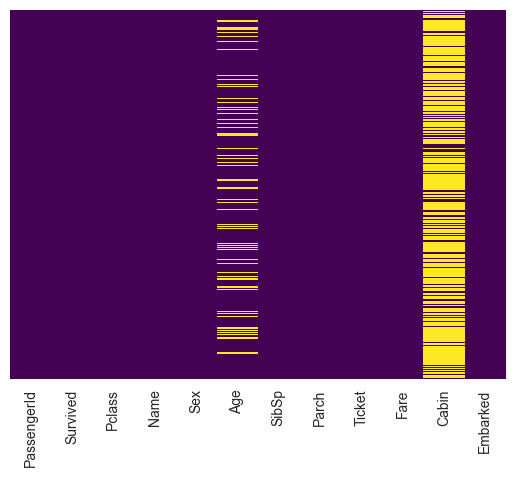

In [23]:
sns.heatmap(train.isna(), yticklabels=False, cbar=False,cmap="viridis")

<Axes: xlabel='Survived', ylabel='count'>

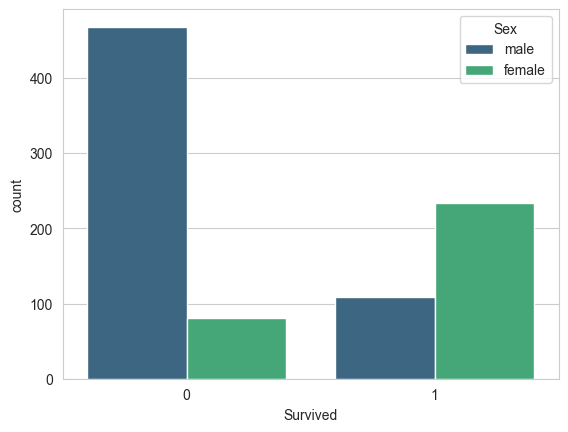

In [44]:
sns.countplot(data= train, x="Survived", hue="Sex" , palette="viridis")

<Axes: xlabel='Survived', ylabel='count'>

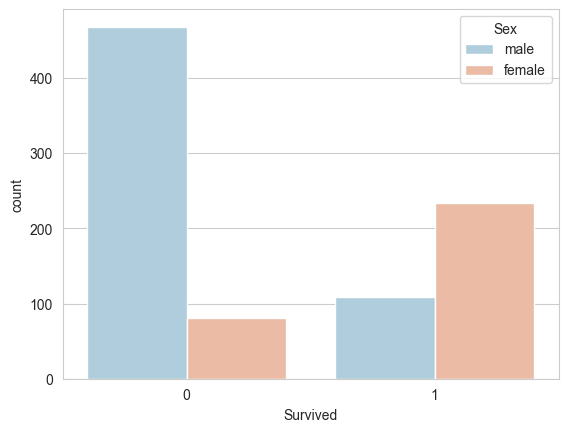

In [45]:
sns.countplot(data=train, x="Survived", hue="Sex", palette="RdBu_r")

<Axes: xlabel='Survived', ylabel='count'>

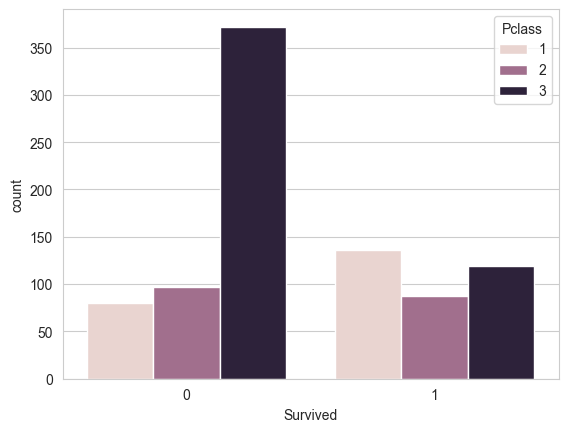

In [46]:
sns.countplot(data=train, x="Survived", hue="Pclass")

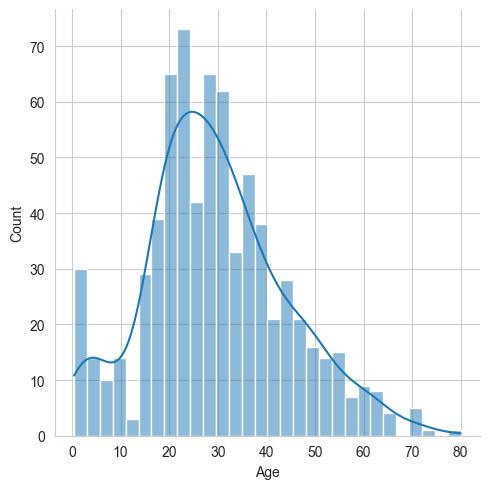

In [47]:
sns.displot(data=train, x=train["Age"].dropna(),kde=True, bins=30)

<Axes: xlabel='Age', ylabel='Count'>

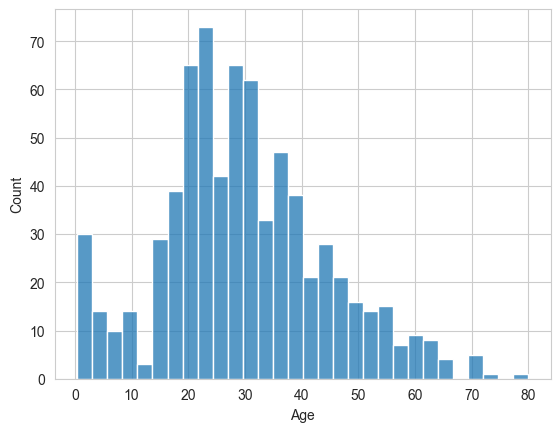

In [48]:
sns.histplot(data=train, x="Age", bins=30)

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


/var/folders/lf/cj1l0kg94pxgnvq94k90_rz00000gn/T/ipykernel_44452/1120297203.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x="SibSp",palette="Set2")


<Axes: xlabel='SibSp', ylabel='count'>

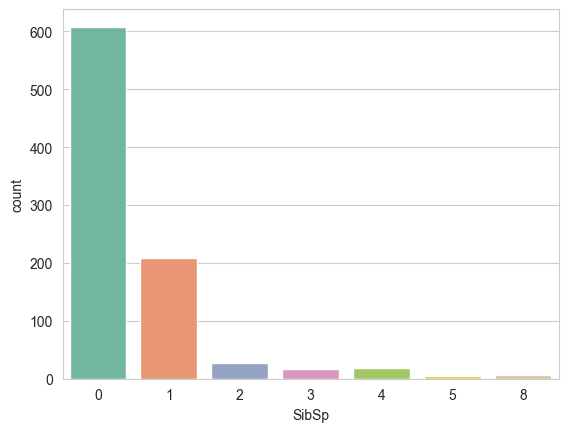

In [54]:
sns.countplot(data=train, x="SibSp",palette="Set2")

<Axes: xlabel='Fare', ylabel='Count'>

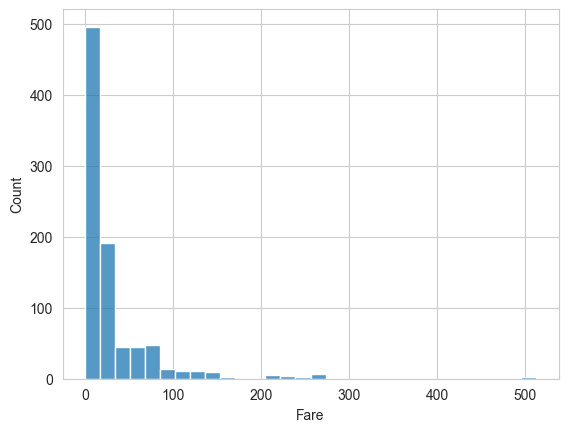

In [59]:
sns.histplot(data=train, x="Fare", bins=30)

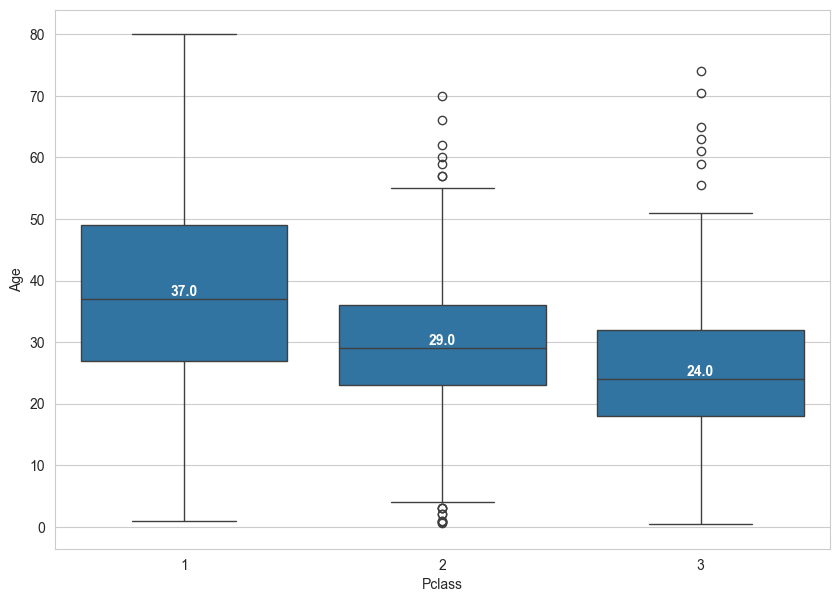

In [60]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(x='Pclass',y='Age',data=train)

medians = train.groupby(['Pclass'])['Age'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='medium', color='w', weight='semibold')

In [62]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [63]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

/var/folders/lf/cj1l0kg94pxgnvq94k90_rz00000gn/T/ipykernel_44452/866791416.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/var/folders/lf/cj1l0kg94pxgnvq94k90_rz00000gn/T/ipykernel_44452/866791416.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

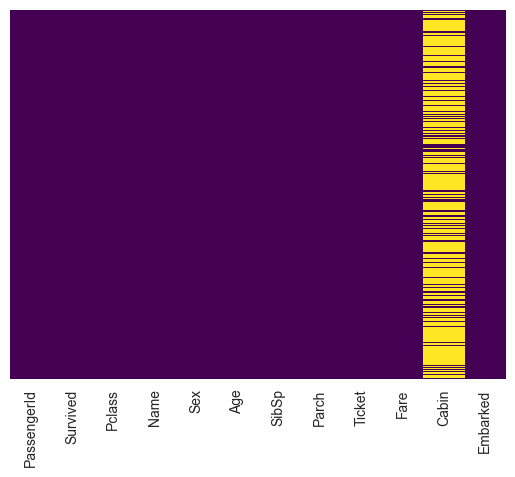

In [64]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [65]:
train.drop("Cabin", axis=1, inplace=True)

In [66]:
sex = pd.get_dummies(train["Sex"], drop_first=True) ## we do drop first == True because if we donot drop female it will create multicolinearity which will mess up algorithm. Beacuse if ML knows first is column if false it will
## predict the next column is true.
sex.head()

,male
0,True
1,False
2,False
3,False
4,True


In [67]:
embark = pd.get_dummies(train["Embarked"], drop_first=True)

In [69]:
train = pd.concat([train,sex, embark], axis=1)

In [70]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True


In [71]:
train.drop(["Name","Sex","Ticket"], axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,1,0,3,22.0,1,0,7.2500,S,True,False,True
1,2,1,1,38.0,1,0,71.2833,C,False,False,False
2,3,1,3,26.0,0,0,7.9250,S,False,False,True
3,4,1,1,35.0,1,0,53.1000,S,False,False,True
4,5,0,3,35.0,0,0,8.0500,S,True,False,True


In [72]:
train.drop('PassengerId',axis=1,inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,22.0,1,0,7.2500,S,True,False,True
1,1,1,38.0,1,0,71.2833,C,False,False,False
2,1,3,26.0,0,0,7.9250,S,False,False,True
3,1,1,35.0,1,0,53.1000,S,False,False,True
4,0,3,35.0,0,0,8.0500,S,True,False,True


In [74]:
train.drop('Embarked',axis=1,inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


## train test split

In [75]:
X = train.iloc[:,1:]

In [76]:
X

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,True,False,True
887,1,19.0,0,0,30.0000,False,False,True
888,3,24.0,1,2,23.4500,False,False,True
889,1,26.0,0,0,30.0000,True,False,False


In [77]:
y= train["Survived"]

In [78]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [79]:
from sklearn.linear_model import LogisticRegression

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [98]:
logModel = LogisticRegression()

In [99]:
logModel.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### predictions

In [100]:
predictions = logModel.predict(X_test)

In [101]:
from sklearn.metrics import classification_report

In [102]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       154
           1       0.78      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [103]:
from sklearn.metrics import confusion_matrix


In [104]:
confusion_matrix(y_test,predictions)

array([[133,  21],
       [ 38,  76]])

<Axes: ylabel='Survived'>

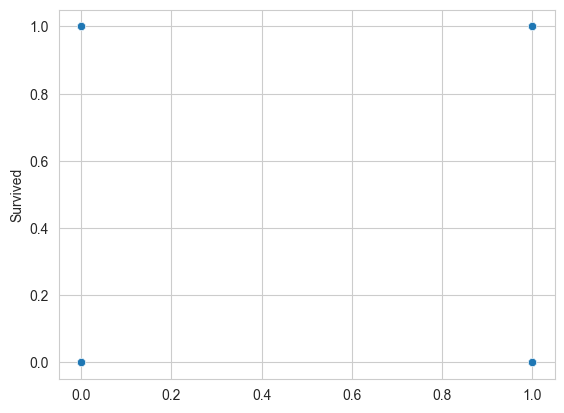

In [112]:
sns.scatterplot(x=predictions,y=y_test)